<a href="https://colab.research.google.com/github/love-bees/twitter/blob/master/data_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

data = pd.read_csv('data.csv', encoding='utf-8')
data.columns = ['id', 'time', 'geo', 'lang', 'hashtags', 'text']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, 'Jezik')

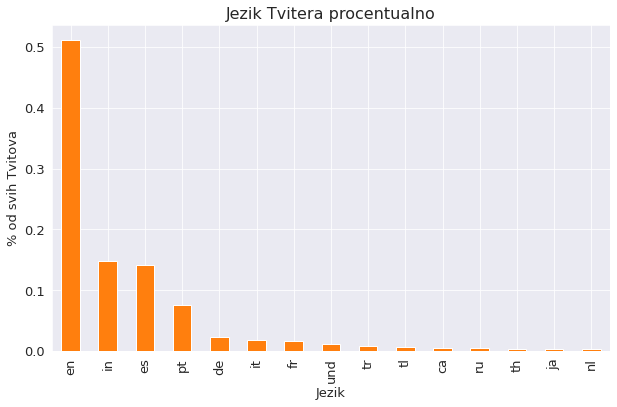

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = data['lang'].value_counts(1).head(15)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='C1')
plt.title('Jezik Tvitera procentualno', fontsize=16)
plt.ylabel('% od svih Tvitova', fontsize=13)
plt.xlabel('Jezik', fontsize=13)

Sređivanje podataka

In [4]:
#izdvajanje podataka koji su samo na engleskom
text = []
date = []
hashes = []
geo = []
for i, item in enumerate(data['lang']):
    if data['lang'][i] == 'en':
        text.append(data['text'][i])
        date.append(data['time'][i])
        hashes.append(data['hashtags'][i])
        geo.append(data['geo'][i])

In [5]:
import re

#prečišćavanje podataka
for i in range(len(text)):
    try:
        text[i] = bytes(text[i][2:-2], 'utf-8').decode('unicode_escape')
        hashes[i] = bytes(hashes[i][2:-1], 'utf-8').decode('unicode_escape')
        text[i] = text[i][:text[i].index('https://t.co/')]
        text[i] = text[i].replace("\n", '')
        text[i] = re.sub(r'[^\x00-\x7F]+','', text[i])
    except:
        continue

In [6]:
#pretvaranje u dataframe
df = pd.DataFrame(columns=['datetime','coordinates','hashes', 'text'])
df['datetime'], df['coordinates'],df['hashes'], df['text'] = [date, geo, hashes, text]
df.head()

,datetime,coordinates,hashes,text
0,2020-04-09 18:35:26,"42.9607521, -80.05056563",,"Hey everyone , wont be streaming until this wh..."
1,2020-04-09 18:34:29,"53.55, -3.05",covid postcovid19 quarantine dogs,"Top Tip Thursday Once lockdown is over, have ..."
2,2020-04-09 18:48:31,"40.89245946, -74.13999694",,Palestinian national heroine Bisan Al-Jubeh (u...
3,2020-04-09 18:48:21,"21.31752233, -157.92366028",harley808 zeus808 storm808 lovemydogs thursday...,Thankful Thursday #harley808 #zeus808 #storm80...
4,2020-04-09 18:47:04,"48.47593351, -81.32806152",,Neighbourhood getting loud for healthcare work...


Sentiment

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

def sentiment_score(text):
    analysis = analyzer.polarity_scores(text)
    return analysis['compound']

analyzer = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['text'].apply(sentiment_score)

df.to_csv('data_cleaned.csv')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [9]:
df.head()

,datetime,coordinates,hashes,text,sentiment_score
0,2020-04-09 18:35:26,"42.9607521, -80.05056563",,"Hey everyone , wont be streaming until this wh...",0.4215
1,2020-04-09 18:34:29,"53.55, -3.05",covid postcovid19 quarantine dogs,"Top Tip Thursday Once lockdown is over, have ...",0.3818
2,2020-04-09 18:48:31,"40.89245946, -74.13999694",,Palestinian national heroine Bisan Al-Jubeh (u...,0.5719
3,2020-04-09 18:48:21,"21.31752233, -157.92366028",harley808 zeus808 storm808 lovemydogs thursday...,Thankful Thursday #harley808 #zeus808 #storm80...,0.5719
4,2020-04-09 18:47:04,"48.47593351, -81.32806152",,Neighbourhood getting loud for healthcare work...,0.0000
